In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("./Resources/newmerged15_df.csv")
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.replace(np.nan, 0)
df

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV,Playoffs
0,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15,1
1,4,21500007,1610612765,16,25,28,23,0,0,0,0,92,0.405,0.735,0.368,16,43,10,1
2,5,21500025,1610612765,23,12,29,19,15,0,0,0,98,0.375,0.500,0.214,18,61,14,1
3,2,21500054,1610612765,30,17,20,15,0,0,0,0,82,0.384,0.647,0.227,14,50,23,1
4,8,21500082,1610612765,21,21,25,33,0,0,0,0,100,0.500,0.500,0.364,15,47,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2,21501195,1610612747,27,26,27,30,0,0,0,0,110,0.494,0.842,0.429,25,40,18,0
2458,7,21501209,1610612747,21,27,13,18,0,0,0,0,79,0.284,0.867,0.226,15,48,15,0
2459,12,21501228,1610612747,19,23,24,35,0,0,0,0,101,0.482,0.867,0.240,19,47,13,0
2460,1,31500001,1610616834,40,52,53,51,0,0,0,0,196,0.550,0.500,0.388,51,59,14,0


# Create a Train Test Split

Use `Playoffs` for the y values

In [5]:
y=df["Playoffs"]
X=df.drop(columns=["Playoffs"])
X

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
0,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15
1,4,21500007,1610612765,16,25,28,23,0,0,0,0,92,0.405,0.735,0.368,16,43,10
2,5,21500025,1610612765,23,12,29,19,15,0,0,0,98,0.375,0.500,0.214,18,61,14
3,2,21500054,1610612765,30,17,20,15,0,0,0,0,82,0.384,0.647,0.227,14,50,23
4,8,21500082,1610612765,21,21,25,33,0,0,0,0,100,0.500,0.500,0.364,15,47,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2,21501195,1610612747,27,26,27,30,0,0,0,0,110,0.494,0.842,0.429,25,40,18
2458,7,21501209,1610612747,21,27,13,18,0,0,0,0,79,0.284,0.867,0.226,15,48,15
2459,12,21501228,1610612747,19,23,24,35,0,0,0,0,101,0.482,0.867,0.240,19,47,13
2460,1,31500001,1610616834,40,52,53,51,0,0,0,0,196,0.550,0.500,0.388,51,59,14


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
X_train.shape, X_test.shape

((1846, 18), (616, 18))

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
importance = classifier.coef_[0]
importance

array([-0.44885915, -0.1839529 ,  0.14335806,  0.69803209,  0.30965117,
        0.60795971,  0.32504377,  0.30310513, -0.6430734 , -0.26314505,
       -0.17443765,  0.80832901,  0.48435418, -0.16996668, -0.33774456,
       -0.46502685,  1.07859593, -1.22289752])

In [12]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.44886
Feature: 1, Score: -0.18395
Feature: 2, Score: 0.14336
Feature: 3, Score: 0.69803
Feature: 4, Score: 0.30965
Feature: 5, Score: 0.60796
Feature: 6, Score: 0.32504
Feature: 7, Score: 0.30311
Feature: 8, Score: -0.64307
Feature: 9, Score: -0.26315
Feature: 10, Score: -0.17444
Feature: 11, Score: 0.80833
Feature: 12, Score: 0.48435
Feature: 13, Score: -0.16997
Feature: 14, Score: -0.33774
Feature: 15, Score: -0.46503
Feature: 16, Score: 1.07860
Feature: 17, Score: -1.22290


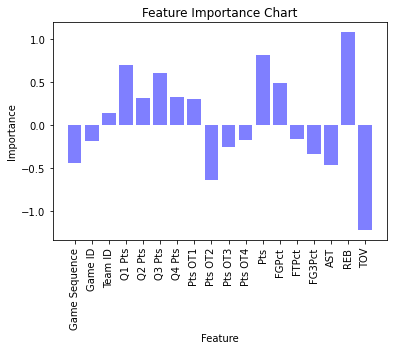

In [13]:
pyplot.bar([x for x in range(len(importance))], importance, color = 'b', alpha = 0.5, align = 'center')
tick_locations = [x for x in range(len(importance))]
pyplot.xticks(tick_locations, ["Game Sequence", "Game ID", "Team ID", "Q1 Pts", "Q2 Pts", "Q3 Pts", 
                            "Q4 Pts", "Pts OT1", "Pts OT2", "Pts OT3", "Pts OT4", "Pts", "FGPct", "FTPct","FG3Pct", "AST", "REB", "TOV"],
                              rotation = 'vertical')
pyplot.title("Feature Importance Chart")
pyplot.xlabel("Feature")
pyplot.ylabel("Importance")
pyplot.show()

In [14]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.5877573131094258
Testing Data Score: 0.6266233766233766
